In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from RotationMethod import Rotator
from PCA import PCA

### Eigenvalue & Eigenvector

**Important :** if $ A . X = \lambda . X$ : then $X$ is the igenvector of the square matrix $A$ and $\lambda$ is its eigenvalue.

**Example:**

$A = \begin{bmatrix} 1 & 2 \\ 3 & 0 \end{bmatrix}$

$A . X = \lambda . X$

$(A - \lambda I). X = 0$ $----->$  This is zero if the determinant $(A -\lambda I)$ is zero 

$\begin{bmatrix} 1-\lambda & 2 \\ 3 & 0-\lambda  \end{bmatrix} . X = 0$ 

$ determinant: (1-\lambda)(0-\lambda) - 6 = 0$

$eigen values: \lambda = 3, \lambda = -2 $

$ if \lambda = 3: (A - \lambda I) = \begin{bmatrix} -2 & 2 \\ 3 & -3 \end{bmatrix}$

$\begin{bmatrix} -2 & 2 \\ 3 & -3 \end{bmatrix} . \begin{bmatrix}x_1 \\x_2 \end{bmatrix} = \begin{bmatrix}0 \\0 \end{bmatrix} ---> x_1 = x_2$, eigenvectors are normalized to unit length: $x_1^2 + x_2^2 = 1$

$x_1 = x_2 = \sqrt{\frac{1}{2}} --->$ eigenvector = $\begin{bmatrix} 0.707\\ 0.707 \end{bmatrix}$ or $\begin{bmatrix} -0.707\\ -0.707 \end{bmatrix}$

$ if \lambda = -2: (A - \lambda I) = \begin{bmatrix} 3 & 2 \\ 3 & 2 \end{bmatrix}$

$\begin{bmatrix} 3 & 2 \\ 3 & 2 \end{bmatrix} . \begin{bmatrix}x_1 \\x_2 \end{bmatrix} = \begin{bmatrix}0 \\0 \end{bmatrix} ---> x_1 = \frac{-2}{3}x_2$

$\frac{4}{9}x_2^2 + x_2^2 = 1 ---> $ eigenvector = $\begin{bmatrix} -0.554\\ 0.832 \end{bmatrix}$ or $\begin{bmatrix} 0.554\\ -0.832 \end{bmatrix}$

**Pseudocode for transforming out data into the top N principal components would look like this:**
- Remove the mean
- Compute the covariance matrix
- Find the eigenvalues and eigenvectors of the covariance matrix
- Sort the eigenvalues from largest to smallest
- Take the top N eigenvectors
- Transform the data into the new space created by the top N eigenvectors

**Important:**
- eigenvectors represent the directions or components for the reduced subspace,
- eigenvalues represent the magnitudes for the directions
- eigen vector: one unit long vector
- eigen value: Sum of squared (SS) distances for all data projected on eigen vector 
- PC1 has the largest SS among all PCs

In [3]:
## convert text file into matrix
def file2matrix(filename , header = True, delimeter="\t", index_y = None):
    """
    Takes a .txt file and returns a list of column names,a matrix of features and
    a vectore of y in case of having a target variable.
    """    
    fr = open(filename)
    colName = []
    if header == True:
        colName = list(fr.readline().strip().split(delimeter))
    numberOfLines = len(fr.readlines())
    fr = open(filename)
    numberOfX = len(fr.readline().split(delimeter)) 
    if index_y is not None:
        numberOfX = len(fr.readline().split(delimeter))-1                   
    returnMatX = np.zeros((numberOfLines,numberOfX))
    classLabelVector = []
    fr = open(filename)
    firstRow = 0
    if header == True:
        firstRow = 1
    index = 0
    for line in fr.readlines()[firstRow:]:
        line = line.strip()                            
        listFromLine = line.split(delimeter)
        if index_y is not None:
            classLabelVector.append(float(listFromLine[index_y]))
            listFromLine.pop(index_y)
        fltListFromLine = list(map(lambda x: float(x) if x!="" else np.nan, listFromLine))                                 
        returnMatX[index,:] = fltListFromLine        
        index += 1
    return colName, returnMatX, classLabelVector

#### First dataset

In [9]:
filename = 'testSet.txt'
colName, returnMatX, target = file2matrix(filename , header = False, delimeter="\t")
data = returnMatX

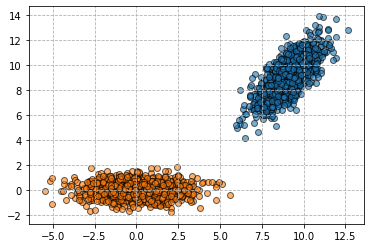

In [10]:
model = PCA(2)
model.fit(data)
transform = model.transform_
plt.scatter(X[:,0],X[:,1],alpha=0.6,edgecolor="k")
plt.scatter(transform[:,0],transform[:,1],alpha=0.6,edgecolor="k")
plt.grid(linestyle="--");

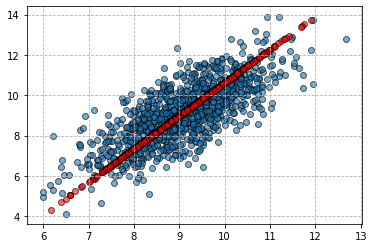

In [12]:
model = PCA(1)
model.fit(data)
# reconstructed data
reCon = model.inv_transform_
plt.scatter(data[:,0],data[:,1],alpha=0.6,edgecolor="k")
plt.scatter(reCon[:,0],reCon[:,1],alpha=0.6, color = "r", edgecolor="k")
plt.grid(linestyle="--");

#### Second dataset

In [14]:
filename = "secom.data"
colName, returnMatX, target = file2matrix(filename , header = False, delimeter=" ")
X = returnMatX
xMean = np.nanmean(X, axis=0)
# replace none values with mean values
data = np.where(np.isnan(X),xMean, X)

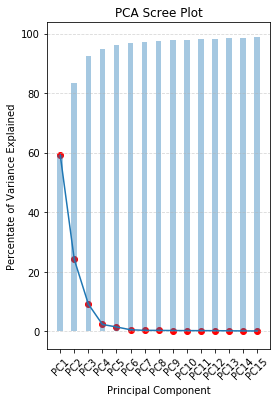

In [17]:
model = PCA()
model.fit(data)
# Scree plot for the first 15 components
model.screePlot(15)

Explained variance ratio by: 
PC1 = 0.593, PC2 = 0.241, PC3 = 0.092


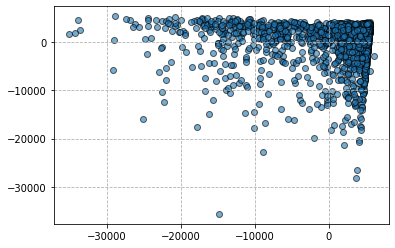

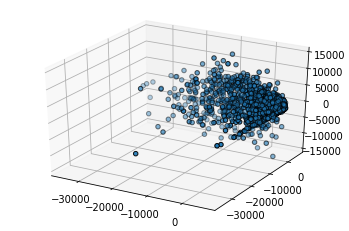

In [19]:
model = PCA(3)
model.fit(data)
var = model.explained_variance_ratio_ 
print(("Explained variance ratio by: \nPC1 = %.3f, PC2 = %.3f, PC3 = %.3f")%(var[0],var[1],var[2]))
# reduced dataset
redData = model.transform(data)

# 2D scatter plot
plt.scatter(redData[:,0],redData[:,1],alpha=.6, edgecolors="k")
plt.grid(linestyle="--");

# 3D scatter plot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(redData[:,0], redData[:,1], redData[:,2],edgecolors="k");

#### Third dataset

In [81]:
import pandas as pd
df = pd.read_csv('climate_change.csv')
df.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [82]:
df = df.drop('Temp', axis = 1)
colNames = df.columns

In [83]:
# Scaling dataset
xMean = df.values.mean(axis=0)
xStd = df.values.std(axis=0)
scaled =(df.values - xMean)/xStd

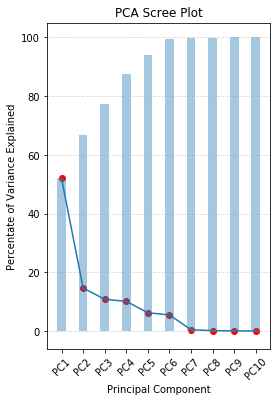

In [84]:
model = PCA()
model.fit(scaled)
model.screePlot()

In [85]:
def matToDf(mat, n_components):
    n,_ = mat.shape
    axis = ["PC%d"%(i+1) for i in range(0,n_components)]
    ind = colNames 
    df = pd.DataFrame(mat, columns=axis, index=ind)
    return df

The loadings matrix shows the relationship between old variables with new principal components i.e.the Pearson correlation between them. The loadings also can be interpreted as regression coefficients. Component Matrix, the same as the loadings matrix

In [86]:
model= PCA(5)
model.fit(scaled)
# loading matrix
loadings = model.loadingMatrix()
matToDf(loadings, 5)

,PC1,PC2,PC3,PC4,PC5
Year,-0.966114,-0.122815,0.132144,-0.021358,-0.160815
Month,0.025007,-0.011055,0.072480,0.994310,-0.025161
MEI,0.158925,0.620605,0.607235,-0.082674,0.165864
CO2,-0.941270,-0.162338,0.131582,-0.097684,-0.195464
CH4,-0.971772,0.111442,0.011152,0.049464,0.022255
N2O,-0.950699,-0.145374,0.119968,0.014123,-0.214480
CFC-11,-0.652576,0.556452,-0.143647,0.046826,0.388428
CFC-12,-0.955703,0.236276,-0.009707,0.035931,0.112753
TSI,-0.134848,0.461413,-0.778507,0.003286,-0.166063
Aerosols,0.384562,0.653824,0.182274,0.006572,-0.542217


In [87]:
rotator = Rotator(method="varimax")
rotator.fit(loadings)
# rotated components using varimax 
rotMat = rotator.fit_transform(loadings)
matToDf(rotMat, 5)

,PC1,PC2,PC3,PC4,PC5
Year,-0.981627,-0.135964,0.022198,-0.013658,0.097375
Month,0.017728,0.004017,0.027623,0.997077,0.005539
MEI,0.141701,0.657853,0.380717,-0.063656,0.460044
CO2,-0.973584,-0.139325,0.030992,-0.087921,0.037896
CH4,-0.889288,-0.116793,-0.118852,0.041467,0.373508
N2O,-0.983285,-0.128489,0.004331,0.023641,0.040239
CFC-11,-0.416331,0.011827,-0.278578,0.014482,0.811117
CFC-12,-0.832880,-0.078523,-0.153846,0.022250,0.509190
TSI,-0.008414,0.052953,-0.912883,-0.033315,0.165547
Aerosols,0.205320,0.898290,-0.190830,0.034601,-0.126278


#### Fourth dataset

In [89]:
df = pd.read_csv("Attitude_Data.csv")
colNames = df.columns
df.head()

,Q10a,Q10b,Q10c,Q10d,Q10e,Q10f,Q10g,Q10h,Q10i,Q10j,...,Q14e,Q14j,Q14k,Q14l,Q14m,Q14n,Q14fR,Q14gR,Q14hR,Q14iR
0,5,5,5,5,5,5,5,3,2,5,...,0,0,0,0,0,0,0,0,0,0
1,2,2,4,3,3,5,4,1,4,1,...,0,0,0,0,0,0,0,0,0,0
2,5,5,5,5,3,3,5,1,5,1,...,3,4,4,5,3,3,2,5,1,5
3,4,3,4,4,4,5,4,3,3,3,...,2,3,3,2,2,2,4,5,5,3
4,1,1,5,5,1,5,5,5,3,4,...,5,3,1,1,1,3,1,1,1,1


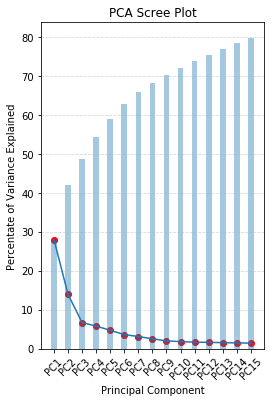

In [90]:
model = PCA()
model.fit(df.values)
model.screePlot(15)

In [98]:
def color_value(val):
    color = 'blue' if np.abs(val) > 0.4 else 'black'
    return 'color: %s' % color

In [ ]:
def color_positive_green(val): 
    """ 
    Takes a scalar and returns a string with 
    the css property `'color: green'` for positive 
    strings, black otherwise. 
    """
    if val > 0: 
        color = 'green'
    else: 
        color = 'black'
    return 'color: %s' % color 
  
df.style.applymap(color_positive_green)

In [99]:
model = PCA(7)
model.fit(df.values)
loadings = model.loadingMatrix()
loadDf = matToDf(loadings, 7)
## without rotation there are a number of cross-loadings
loadDf.style.applymap(color_value)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Q10a,0.622949,-0.418251,0.0285705,-0.052917,-0.369778,-0.105027,-0.0767693
Q10b,0.627088,-0.391749,0.0515221,-0.0630267,-0.383656,-0.103422,-0.062141
Q10c,0.491763,0.262731,0.265346,0.195448,-0.264353,-0.00857772,-0.0267853
Q10d,0.465596,0.37965,0.182038,0.218069,-0.287644,-0.0215069,0.00107938
Q10e,0.549098,-0.0719344,0.278136,0.188177,-0.12814,0.0127597,-0.0236895
Q10f,0.466423,0.376239,0.118476,0.238409,-0.273009,0.152289,-0.0372294
Q10g,0.466701,0.391435,0.0321111,0.200124,-0.342951,0.0896402,0.109889
Q10h,0.277192,0.0841579,0.447574,-0.0758267,0.0137984,-0.105475,-0.113341
Q10i,0.39423,-0.161769,0.499053,0.124428,0.0568798,-0.147643,-0.107765
Q10j,0.296741,0.425544,0.333314,0.0747429,-0.0982183,-0.0910802,0.00111784


In [100]:
rotator = Rotator(method="promax")
rotator.fit(loadings)
# rotated components using oblique rotation 
rotMat = rotator.fit_transform(loadings)
rotLoadDf = matToDf(rotMat, 7)
## with rotation there less cross-loadings
rotLoadDf.style.applymap(color_value)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Q10a,0.577659,-0.179632,0.343726,-0.0302823,-0.125828,-0.265529,0.196135
Q10b,0.550522,-0.171911,0.371044,-0.0575412,-0.140216,-0.273652,0.198925
Q10c,0.0366083,0.0398196,0.681043,0.00224817,-0.0440126,0.0554095,-0.0525157
Q10d,0.00697545,0.119431,0.70025,0.0406203,-0.126882,0.101205,-0.00860194
Q10e,0.0896752,-0.105062,0.499846,-0.00211645,0.21593,-0.00304591,0.00400501
Q10f,0.0140305,-0.0560078,0.685049,0.0113519,-0.124743,0.308215,-0.0582625
Q10g,-0.072725,0.0359089,0.700318,-0.0258077,-0.227153,0.205,0.161946
Q10h,0.0658501,0.106909,0.223461,-0.178365,0.171817,-0.16064,-0.267736
Q10i,0.0750492,0.0182116,0.304926,0.00841527,0.426995,-0.222074,-0.198094
Q10j,-0.120991,0.254749,0.473597,-0.0891335,0.00280755,-0.00890766,-0.140081
